# <b>Machine Learning Mini Project.</b>
## <b>Title : Movie Recommender System.</b>
### Name : Sarang Manoj Pekhale.
### Roll No. : MT2212
### Weekly Report : EDA

### <b>Introduction : </b>
Exploratory Data Analysis (EDA) is a crucial step in the development of a movie recommender system. EDA involves the thorough examination and visualization of the data. This process helps to gain insights into the data, identify patterns, and make informed decisions about how to build and improve the recommender system.
By conducting a comprehensive EDA, It will be better equipped to make informed decisions about the design and implementation of movie recommender system, including selecting appropriate algorithms, feature engineering strategies, and evaluation metrics. EDA helps to understand the nuances of the data, leading to a more effective and accurate recommendation system.

### <b>Libraries required :</b>
<ul>
<li> <b>numpy</b> : Working with arrays, matrices, and mathematical functions.</li> 
<li> <b>pandas</b> : Data structures DataFrames and Series, for handling structured data efficiently.</li>
<li> <b>ast</b> : Parses and evaluates literal expressions.</li>
<li> <b>matplotlib.pyplot</b> : For creating data visualizations, such as charts and plots.</li>
<li> <b>seaborn</b> : Data visualization library built on top of Matplotlib, designed to make data visualization more attractive and informative.</li>
<li> <b>datetime</b> : For working with dates and times in Python.</li>
<li> <b>cpi</b> : To use consumer price index for adjusting the wealth according to inflation.</li>
<li> <b>%matplotlib inline</b> :  To display Matplotlib plots inline within the notebook or script's output.</li>
</ul>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import ast
import datetime
import cpi
%matplotlib inline

<ul>
    <li>Importing two CSV files into your Python environment using pandas, and created two DataFrames, df_credits and df_movies, to store and work with the data from these files.</li>
</ul>

In [44]:
df_credits = pd.read_csv("tmdb_5000_credits.csv")
df_movies = pd.read_csv("tmdb_5000_movies.csv")

<ul>
    <li>Data size or dimensions : Number of rows and columns in the dataset.</li>
</ul>

In [45]:
print('shape df_credits ',df_credits.shape)
print('shape df_movies ',df_movies.shape)

shape df_credits  (4803, 4)
shape df_movies  (4803, 20)


<ul>
    <li> Rename the 'movie_id' column to 'id' in the first dataframe.</li>
    <li> Remove the title column from CREDITS dataset to avoid duplicate columns.</li> 
    <li> Merge the two dataframes CREDITS and MOVIES based on the common 'id' column.</li> 
    </ul>
</ul>

In [46]:
# Rename the 'movie_id' column to 'id' in the first dataframe

df_credits = df_credits.rename(columns={'movie_id': 'id'})
df_credits=df_credits.drop('title',axis=1)

# Merge the two dataframes based on the common 'id' column

df = df_credits.merge(df_movies, on='id')
print('shape df ',df.shape)

shape df  (4803, 22)


<ul>
    <li> Check for duplicate columns and duplicate rows in the DataFrame df. </li>
</ul>

In [47]:
print(df.columns.duplicated().sum())
print(df.duplicated().sum())

0
0


<ul>
    <li> Number and types of features/columns in the dataset. </li>
</ul>

In [48]:
df.columns

Index(['id', 'cast', 'crew', 'budget', 'genres', 'homepage', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

<ul>
    <li> Descriptive statistics of a DataFrame.</li>
</ul>

In [49]:
df.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<ul>
    <li> Summary of the DataFrame's basic information.</li>
</ul>

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   cast                  4803 non-null   object 
 2   crew                  4803 non-null   object 
 3   budget                4803 non-null   int64  
 4   genres                4803 non-null   object 
 5   homepage              1712 non-null   object 
 6   keywords              4803 non-null   object 
 7   original_language     4803 non-null   object 
 8   original_title        4803 non-null   object 
 9   overview              4800 non-null   object 
 10  popularity            4803 non-null   float64
 11  production_companies  4803 non-null   object 
 12  production_countries  4803 non-null   object 
 13  release_date          4802 non-null   object 
 14  revenue               4803 non-null   int64  
 15  runtime              

<ul>
    <li> Count the number of missing (null) values in each column of a DataFrame df. </li>
</ul>

In [51]:
df.isnull().sum()

id                         0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

<ul>
    <li> The 'homepage,' and 'tagline,' columns are removed, because the two contain lots of null values. Also dropping missing values rowise. </li>
</ul>

In [52]:
df=df.drop('homepage',axis=1)
df=df.drop('tagline',axis=1)
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

id                      0
cast                    0
crew                    0
budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

<ul>
    <li> Identify the columns in the DataFrame df that have numeric datatype.</li>
</ul>

In [54]:
num_col = df.dtypes[df.dtypes != 'object'].index
num_col

Index(['id', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

<ul>
    <li><b>Pairplot</b> : The plot is created without scaling. A grid of scatterplots for each pair of numerical columns, allowing to quickly explore how variables are related to each other. </li>
</ul>

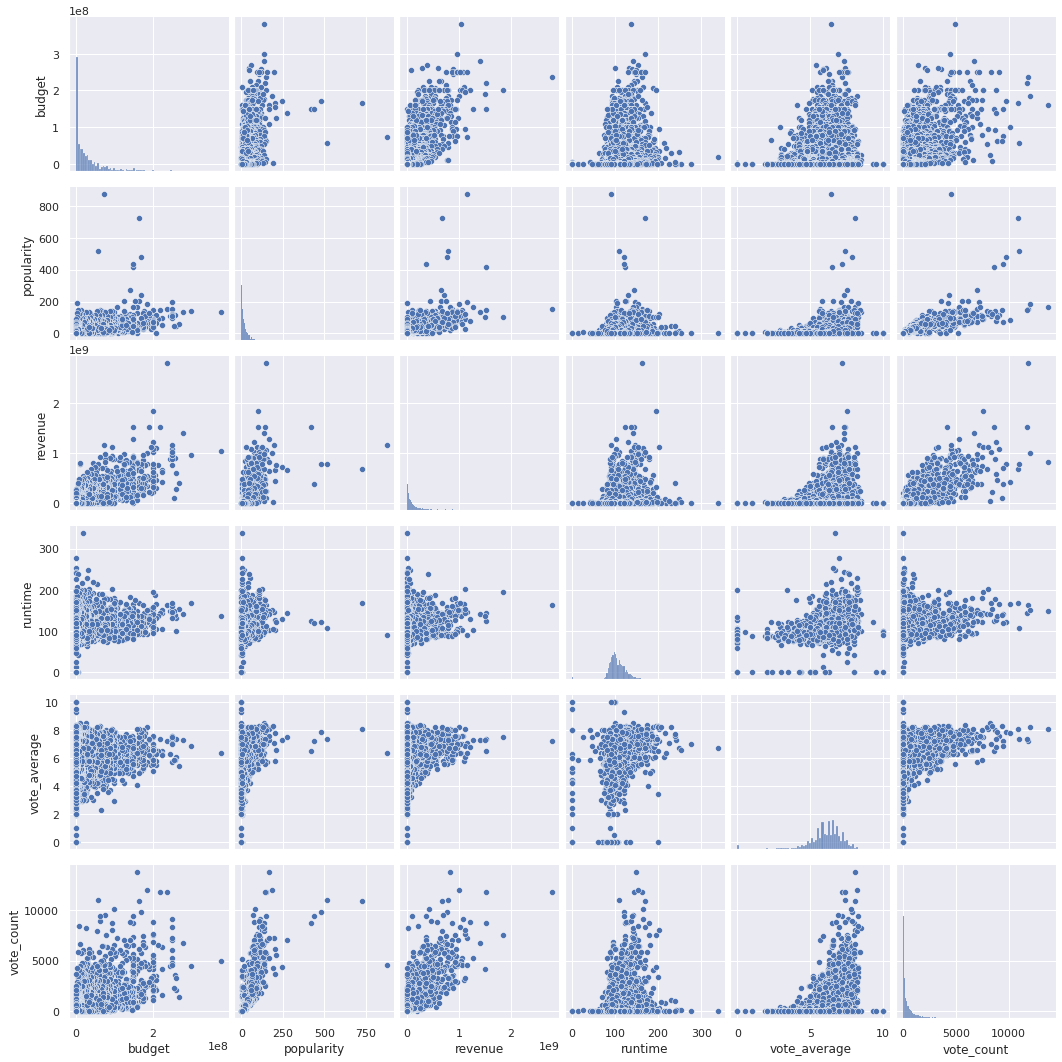

In [55]:
sns.pairplot(df[num_col[1:]])
plt.savefig("pairplot.png")

<ul>
    <li><b>Pairplot</b> : The plot is created with scaling down the x axis. </li>
</ul>

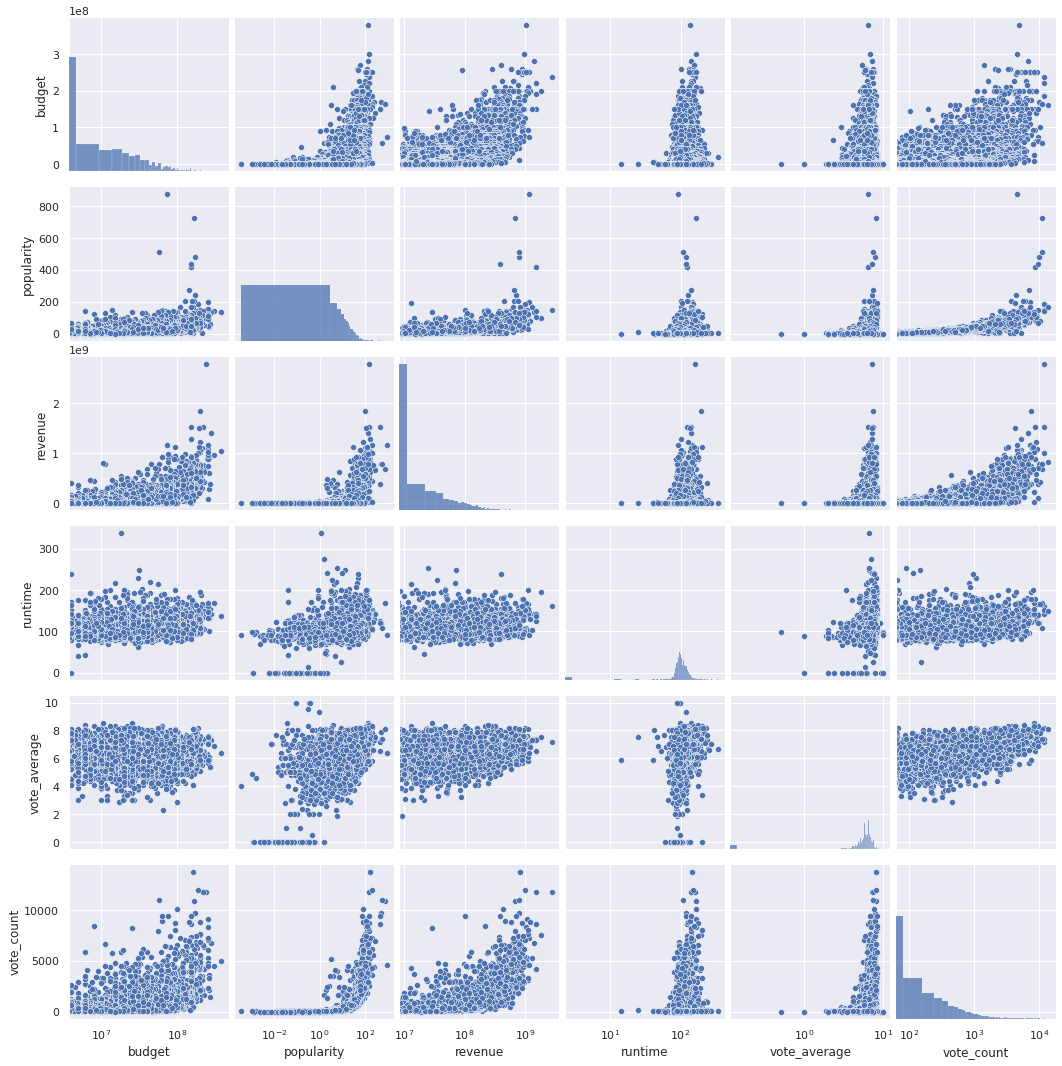

In [56]:
pp = sns.pairplot(df[num_col[1:]])

for ax in pp.axes.flat:
    if ax.get_xlabel() in num_col:
        ax.set(xscale="log")
plt.savefig("pairplot_log.png")

<ul>
    <li><b>Correlation matrix as a heatmap</b> : By visualizing the correlation matrix as a heatmap, can identify which pairs of variables are strongly correlated, which might help in feature selection, or gaining insights into the relationships within your dataset. </li>
</ul>

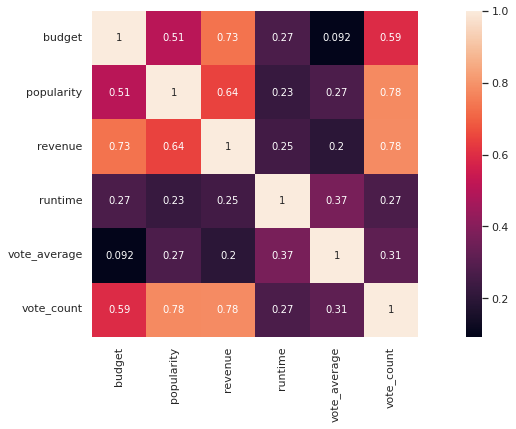

In [57]:
plt.figure(figsize = (17,6))
corr = df[num_col[1:]].corr()
sns.heatmap(corr,annot = True,square = True)
plt.savefig("correlation.png")

<ul>
    <li><b>Movies Runtime</b> : In this section i will plot a histogram to depict the distribution of Movie runtime against the number of movies and also plot a boxplot to get an idea about how many movies falls under a certain threshold of runtime. We can make assumptions about outliers and complete zero runtime that they are series or never released movies. </li>
</ul>

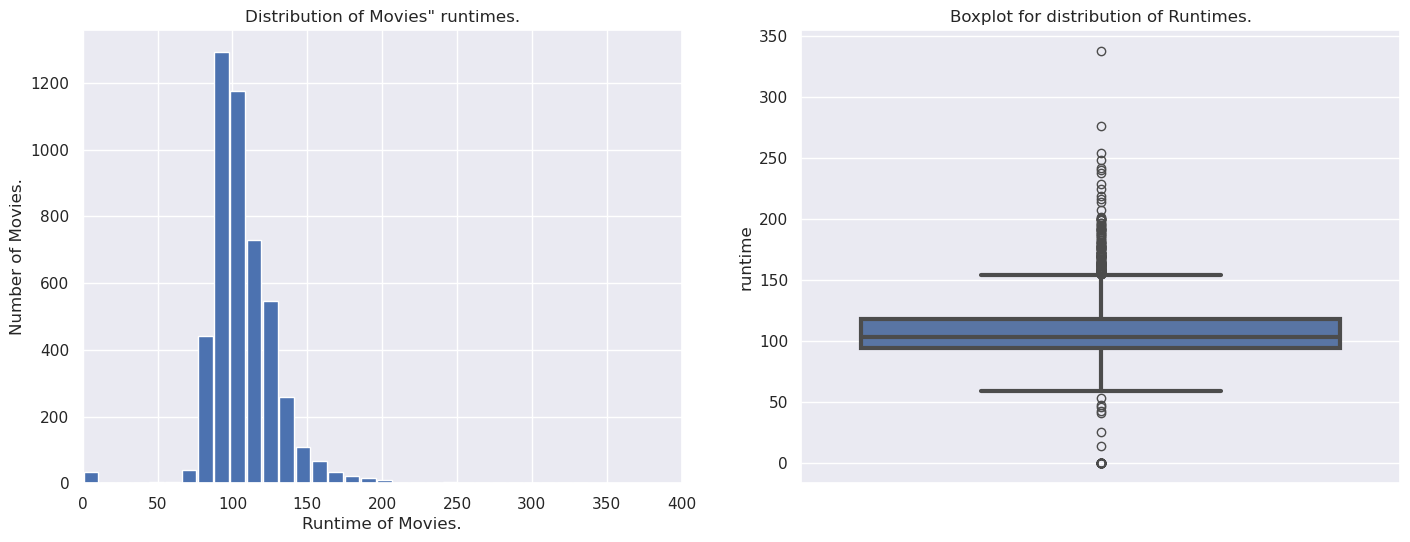

In [58]:
fig = plt.figure(figsize = (17,6),dpi = 100)
fig.add_subplot(1,2,1)
plt.hist(df['runtime'],bins = 31, rwidth = 0.9)
plt.xlabel('Runtime of Movies.', fontsize = 12)
plt.ylabel('Number of Movies.', fontsize = 12)
plt.title('Distribution of Movies" runtimes.', fontsize = 12)
plt.xlim(0,400)

fig.add_subplot(1,2,2)
sns.boxplot(df['runtime'],linewidth = 3)
plt.title('Boxplot for distribution of Runtimes.', fontsize = 12)
plt.savefig("Movie_runtime.png")

<ul>
    <li><b>Budget vs Revenue</b> : To show the real behaviour of Budget against Revenue and vice-a-versa, I have transformed the data into logarithm scale. Using scatter plot will showcase the correlation they shared with each other with respect to each movie. </li>
</ul>

/nfs/cms/mtech22/pekhale.sarang/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


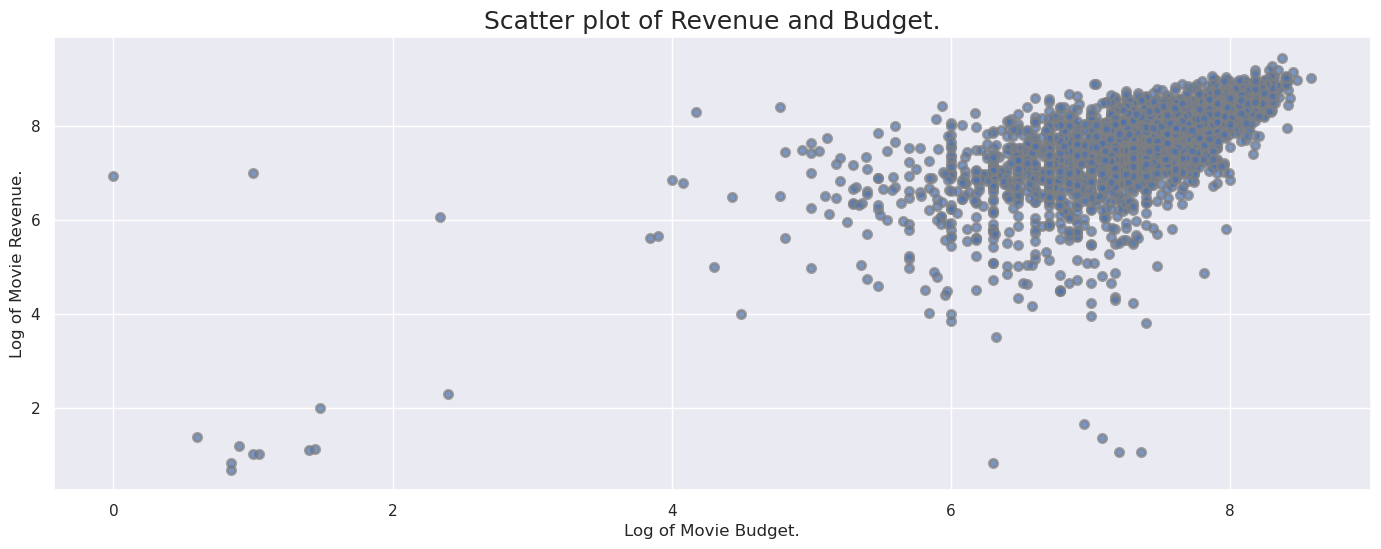

In [59]:
plt.figure(figsize = (17,6),dpi = 100)
plt.scatter(x= np.log10(df["budget"]),
            y =np.log10(df["revenue"]),
           cmap="Blues", alpha = 0.7,edgecolors="grey", linewidth=2);
plt.xlabel('Log of Movie Budget.',fontsize = 12);
plt.ylabel('Log of Movie Revenue.',fontsize= 12);
plt.title("Scatter plot of Revenue and Budget.", fontsize = 18);
plt.savefig("budget_revenue.png")

<ul>
    <li> The format of "release_date" is changed to a standard format of date "yyyy"/"mm"/"dd". </li>
</ul>

In [60]:
df['release_date'] =  pd.to_datetime(df['release_date'], format ='%Y-%m-%d')

<ul>
    <li> Coverting the jason formatted features to a list format.</li>
</ul>

In [61]:
columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']

def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i["name"])
    return L
# We extract the names from the json data
for col in columns: 
    df[col] = df[col].apply(convert)

df.head(1)

,id,cast,crew,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800


<ul>
    <li> Extracting "year", "month", "day" from the "release_date" feature.</li>
</ul>

In [62]:
df['release_date'] = df['release_date'].map(lambda dates: datetime.datetime.strptime(str(dates), '%Y-%m-%d %H:%M:%S'))
df['day_of_year'] = df['release_date'].map(lambda dates: dates.timetuple().tm_yday)

df['year'] = df['release_date'].map(lambda dates: dates.year)
df['month'] = df['release_date'].map(lambda dates: dates.month)

<ul>
    <li> Again converting the jason formatted "cast" and "crew" into list format and selecting some particular factors such as 'name', 'gender', 'job', 'department', from these features for futher EDA evaluation purpose.  </li>
</ul>

In [63]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i)
    return L

columns = ['cast', 'crew']

for col in columns: 
    df[col] = df[col].apply(convert)
    
df['cast'] = df['cast'].map(lambda x:[ [i['name'],i['gender']] for i in x])
df['crew'] = df['crew'].map(lambda x:[ [i['name'],i['job'],i['department'],i['gender']] for i in x])

<ul>
    <li> Segragating the data on the basis of "title" and checking if the which Movie Title is repeated how many times or not.  </li>
</ul>

In [64]:
count_title = df.groupby('title').title.count()
count_title[count_title != 1]

title
Batman             2
Out of the Blue    2
The Host           2
Name: title, dtype: int64

<ul>
    <li> Noticing there indexes.  </li>
</ul>

In [65]:
double_title = count_title[count_title != 1].index.values

<ul>
    <li> Now integrating the Movie Title with there release date to ensure each observation remains unique and verifying again.  </li>
</ul>

In [66]:
df.title = df.apply(lambda row: row.title+'_'+str(row.release_date) if (row.title in double_title) else row.title,axis = 1)

In [67]:
count_title = df.groupby('title').title.count()
count_title[count_title != 1]

Series([], Name: title, dtype: int64)

<ul>
    <li><b>Movies Budget</b> : Histogram of Movies Budget suggesting the distribution of Budgets against the number of movies had that particular budget. </li>
</ul>

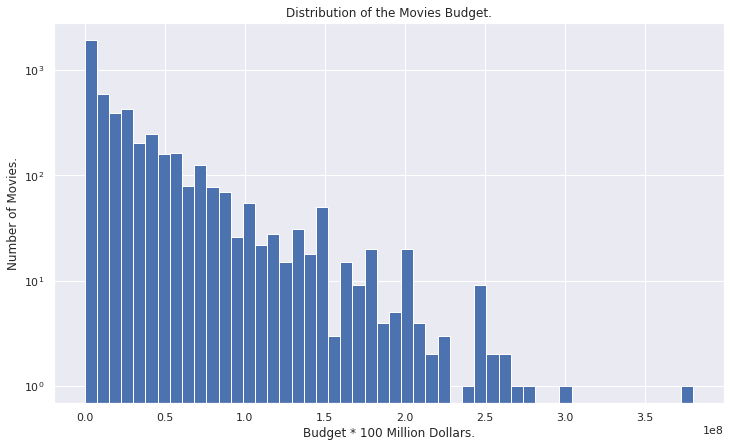

In [68]:


plt.figure(figsize=(12,7))
plt.hist(df['budget'],bins= 50)
plt.title("Distribution of the Movies Budget.")
plt.xlabel('Budget * 100 Million Dollars.')
plt.ylabel('Number of Movies.')
plt.yscale("log")
plt.savefig("movie_budget.png")
plt.show()

<ul>
    <li><b>Movies Revenues</b> : Distribution of Movies Revenues across the Movies. </li>
</ul>

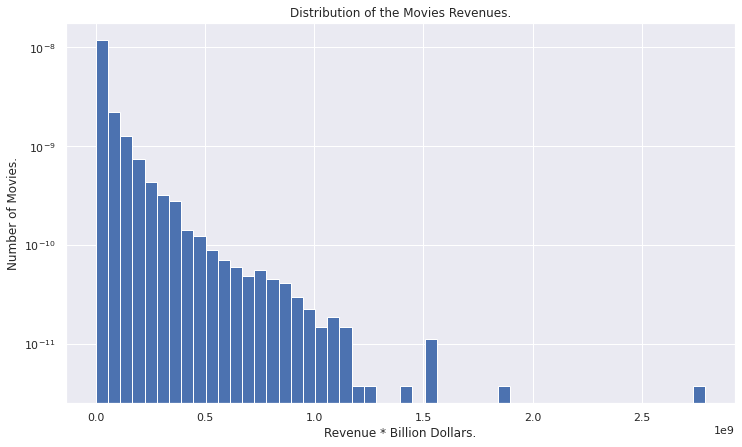

In [69]:
plt.figure(figsize=(12,7))
plt.hist(df['revenue'], bins= 50,density=True)
plt.title("Distribution of the Movies Revenues.")
plt.xlabel('Revenue * Billion Dollars.')
plt.ylabel('Number of Movies.')
plt.yscale("log")
plt.savefig("movies_revenue_png")
plt.show()

<ul>
    <li> One movie can include several generes. Therefore to note the specific generes, I will split the dataset rowwise upon "generes".  </li>
</ul>

In [70]:
df_genres = df.explode('genres')
df_genres.head(1)

,id,cast,crew,budget,genres,keywords,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,day_of_year,year,month
0,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,Action,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,344,2009,12


<ul>
    <li> Number of unique generes this dataset contains.  </li>
</ul>

In [71]:
df_genres.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', 'TV Movie', nan], dtype=object)

<ul>
    <li> Counting the particular generes based movies on the basis of the id's of the movies.  </li>
</ul>

In [72]:
count_genres = df_genres.groupby('genres').count()[['id']].sort_values(by='id', ascending=False)
count_genres

,id
genres,
Drama,2296
Comedy,1722
Thriller,1274
Action,1154
Romance,894
Adventure,790
Crime,696
Science Fiction,535
Horror,519


<ul>
    <li><b>Movies by Generes</b> : Plotting a pie chart to analyse the share of each genere in the movies.  </li>
</ul>

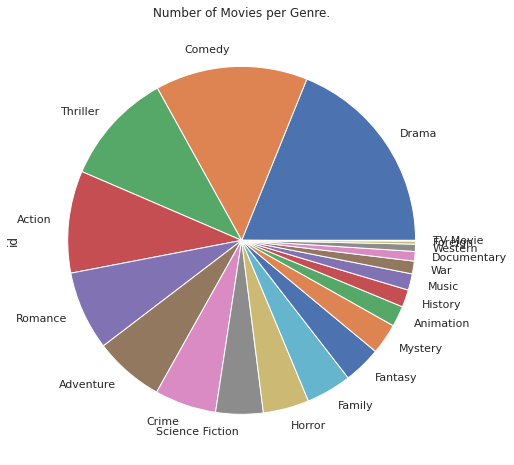

In [73]:
count_genres.plot(kind ='pie',figsize=(10,8),legend = False, subplots = True)
plt.title('Number of Movies per Genre.')
plt.savefig("genere_pie_chart.png")
plt.show()

<ul>
    <li> Differentiating 'genres', 'revenue' on the basis of generes.  </li>
</ul>

In [74]:
df_genres_revenue = df[['genres','revenue']].explode('genres')
df_genres_revenue

,genres,revenue
0,Action,2787965087
0,Adventure,2787965087
0,Fantasy,2787965087
0,Science Fiction,2787965087
1,Adventure,961000000
...,...,...
4800,Drama,0
4800,Romance,0
4800,TV Movie,0
4801,NaN,0


<ul>
    <li><b>Movies Revenues by Generes</b> : Analysing the revenues collected by each genere so far by plotting multiple boxplot.  </li>
</ul>

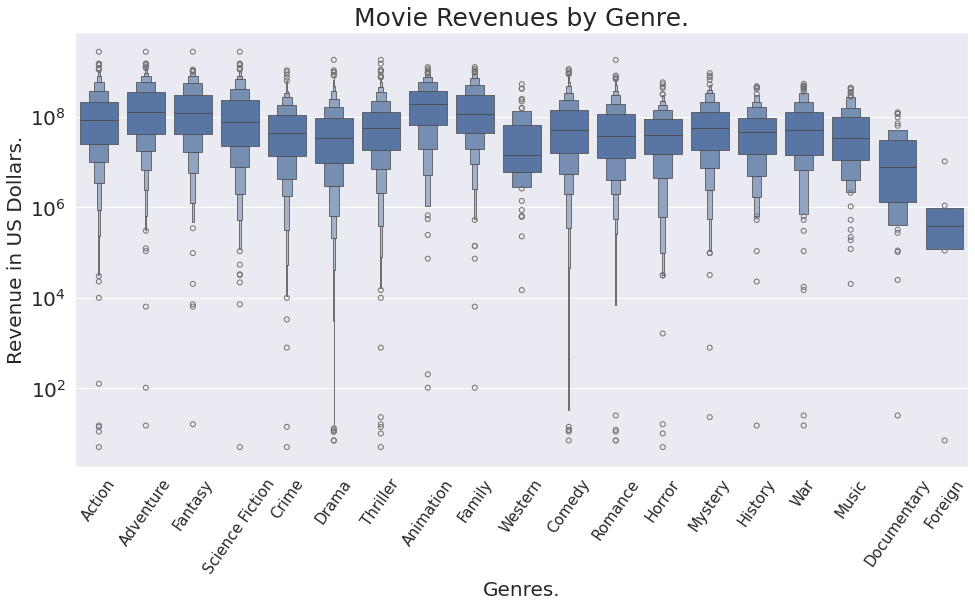

In [75]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(16, 8))
sns.boxenplot(data=df_genres_revenue[df_genres_revenue["revenue"]>0].reset_index(),x="genres",y="revenue")
plt.yticks(fontsize=20)
plt.yscale("log")
plt.xticks(rotation=55,fontsize=15)
plt.xlabel("Genres.",fontsize=20)
plt.ylabel("Revenue in US Dollars.",fontsize=20)
plt.title("Movie Revenues by Genre.",fontsize=25)
plt.savefig("movie_revenue_by_genre.png")
plt.show()

<ul>
    <li> Summing the revenues of each genere.  </li>
</ul>

In [76]:
df_genres_revenue = df_genres_revenue.groupby('genres')[['revenue']].sum()
df_genres_revenue

,revenue
genres,
Action,162959914515
Adventure,164841561551
Animation,52812167865
Comedy,122760517608
Crime,46040860686
Documentary,1082277678
Drama,119710983984
Family,83283238689
Fantasy,81982199925


<ul>
    <li><b>Movie Revenue by Generes</b> : Plotting a pie chart to analyse the share of each genere in the movies revenues.  </li>
</ul>

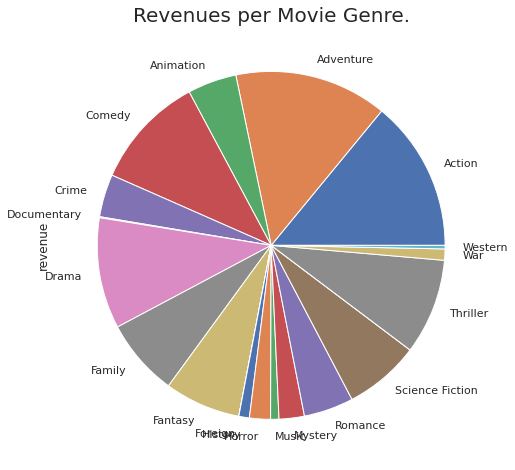

In [77]:
df_genres_revenue.plot(kind ='pie',figsize=(16,8),legend = False, subplots = True)
plt.title('Revenues per Movie Genre.',fontsize=20)
plt.savefig("movie_revenue_by_genre_pie_chart.png")
plt.show()

<ul>
    <li> Differentiating 'genres', 'vote_average' on the basis of generes.  </li>
</ul>

In [82]:
df_genres_grade = df[['genres','vote_average']].explode('genres')
df_genres_grade = df_genres_grade.loc[:,~df_genres_grade.columns.duplicated()]
df_genres_grade = df_genres_grade.reset_index()
df_genres_grade.head()

,index,genres,vote_average
0,0,Action,7.2
1,0,Adventure,7.2
2,0,Fantasy,7.2
3,0,Science Fiction,7.2
4,1,Adventure,6.9


<ul>
    <li><b>Movies Scores by Generes</b> : Analysing the scores obtained by each genere so far by plotting multiple boxplot.  </li>
</ul>

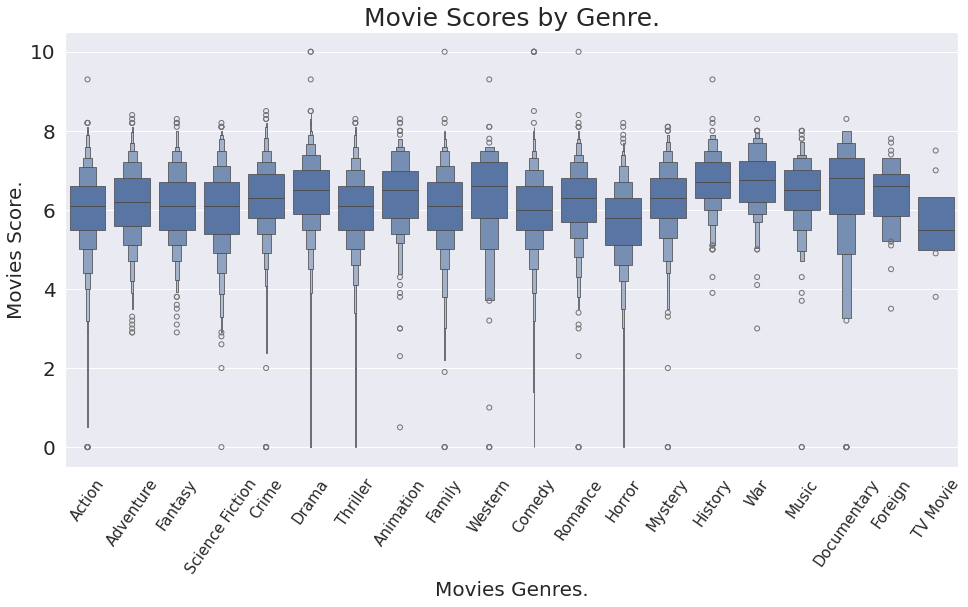

In [83]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(16, 8))
sns.boxenplot(data=df_genres_grade,x="genres",y="vote_average")
plt.yticks(fontsize=20)
plt.xticks(rotation=55,fontsize=15)
plt.xlabel("Movies Genres.",fontsize=20)
plt.ylabel("Movies Score.",fontsize=20)
plt.title("Movie Scores by Genre.",fontsize=25)
plt.savefig("movie_scores_by_genres.png")
plt.show()

<ul>
    <li> Sorting 'title', 'popularity' on the basis of 'popularity'.  </li>
</ul>

In [39]:
df_movie_pop = df[['title','popularity']].sort_values(by='popularity', ascending=False)
df_movie_pop.head()

,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564


<ul>
    <li><b>Movies Popularity and Budget</b> : Analysing the popularity gained by each movie so far by plotting scatterplot against the budget of the movies. And noting the outliers which has shown exceptional behaviour. </li>
</ul>

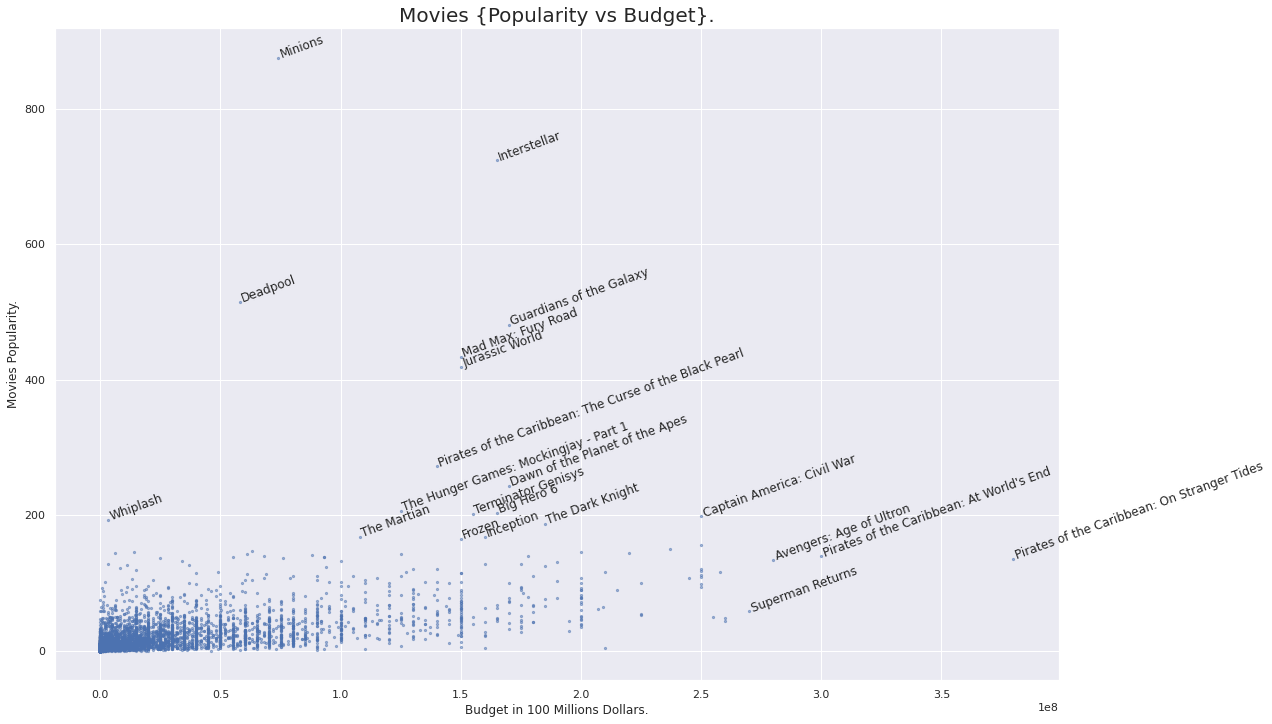

In [84]:
x=df["budget"]
y=df["popularity"]
fig,ax=plt.subplots(figsize=(18,12))
plt.scatter(x,y,alpha=0.5,s=5)
plt.title("Movies {Popularity vs Budget}.",fontsize=20)
plt.xlabel("Budget in 100 Millions Dollars.")
plt.ylabel("Movies Popularity.")
for index , row in df.iterrows():
    x=row["budget"]
    y=row["popularity"]
    if((500000000>x>260000000) | (y>160)):
        plt.annotate(text=row["title"],xy=(x,y),rotation=20)
plt.savefig("movies_popu_budget.png")

<ul>
    <li> Sorting 'title','revenue','release_date' on the basis of 'release_date' by setting it as index of the selected features.  </li>
</ul>

In [86]:
df_movie_revenue = df[['title','revenue','release_date']].set_index('release_date').sort_values(by='revenue', ascending=False)
df_movie_revenue.head()

,title,revenue
release_date,,
2009-12-10,Avatar,2787965087
1997-11-18,Titanic,1845034188
2012-04-25,The Avengers,1519557910
2015-06-09,Jurassic World,1513528810
2015-04-01,Furious 7,1506249360


<ul>
    <li><b>Movies Revenue and Release Year</b> : Analysing the revenue generated by each movie so far by plotting a lineplot against the release year of the movies. </li>
</ul>

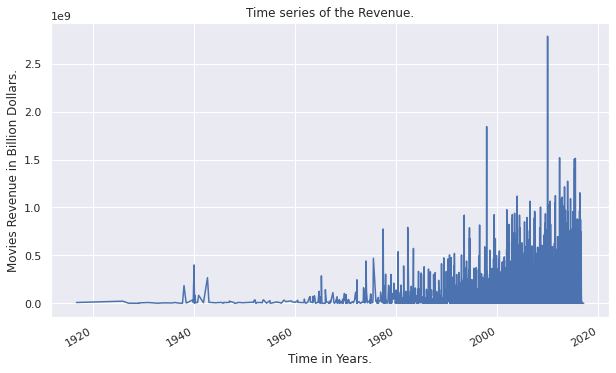

In [87]:
df_movie_revenue.plot(figsize=(10,6),legend = False)
plt.title('Time series of the Revenue.')
plt.xlabel("Time in Years.")
plt.ylabel("Movies Revenue in Billion Dollars.")
plt.savefig("movie_revenue_release.png")
plt.show()

<ul>
    <li> Spliting 'genres', 'revenue', 'year' on the basis of 'genres' by grouping them on the basis of 'genres','year'.  </li>
</ul>

In [88]:
df_genres_revenue_year = df[['genres','revenue','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.head()

revenue
genres year         
Action 1930  8000000
       1936  2736000
       1947        0
       1949  7800000
       1950  8000000

<ul>
    <li><b>Movies Revenue and Release Year with Generes</b> : Analysing the revenue generated by each movie so far by plotting a multi barplot representing each genere against the release year of the movies. </li>
</ul>

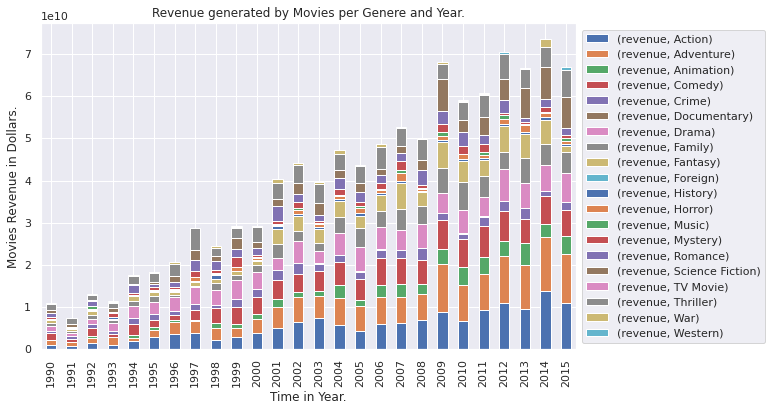

In [89]:
fig = plt.figure()
ax = plt.subplot(111)

starting_year = 1990
df_genres_revenue_year = df[['genres','revenue','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.unstack(level=0).fillna(0).loc[starting_year:2015].plot(kind = 'bar',stacked=True, ax=ax, figsize=(12,6),legend  = True)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Revenue generated by Movies per Genere and Year.')
plt.ylabel('Movies Revenue in Dollars.')
plt.xlabel('Time in Year.')
plt.savefig("movie_rev_release_genre.png")
plt.show()

<ul>
    <li> Converting and adjusting the Movie Budget and Movie Revenue according to the inflation with respect to year of release.  </li>
</ul>

In [90]:
df["budget_adjusted"] = df.apply(lambda x: cpi.inflate(x["budget"],x["year"],to=2016),axis=1)
df["revenue_adjusted"] = df.apply(lambda x: cpi.inflate(x["revenue"],x["year"],to=2016),axis=1)

<ul>
    <li> Sorting 'title', 'revenue_adjusted', 'release_date' on the basis of 'revenue_adjusted' by setting 'release_date' as index of the selected features.  </li>
</ul>

In [91]:
df_movie_revenue_adjusted = df[['title','revenue_adjusted','release_date']].set_index('release_date').sort_values(by='revenue_adjusted', ascending=False)
df_movie_revenue_adjusted.head()

,title,revenue_adjusted
release_date,,
1939-12-15,Gone with the Wind,6.909723e+09
1942-08-14,Bambi,3.937987e+09
2009-12-10,Avatar,3.118954e+09
1937-12-20,Snow White and the Seven Dwarfs,3.082181e+09
1977-05-25,Star Wars,3.070973e+09


<ul>
    <li><b>Movies Revenue and Adjusted Revenue vs Movie Year</b> : Plotting a lineplot of revenue generated by each movie with respect to their release year with adjusted revenue. </li>
</ul>

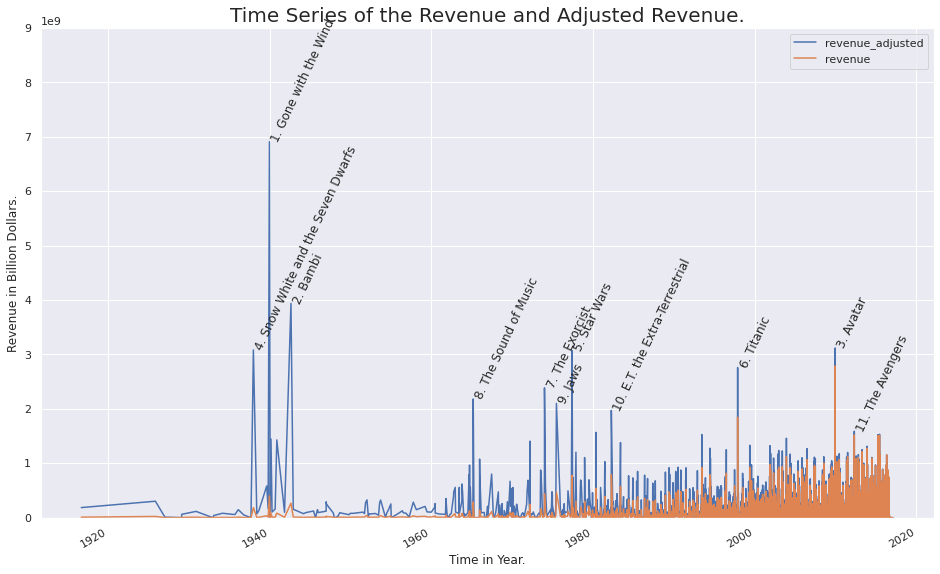

In [92]:
df_movie_revenue_adjusted.reset_index(
    ).merge(df_movie_revenue,how="inner").set_index("release_date").sort_index().drop(columns=["title"]).plot(figsize=(16,10))
plt.title('Time Series of the Revenue and Adjusted Revenue.',fontsize=20)
plt.xlabel("Time in Year.")
plt.ylabel("Revenue in Billion Dollars.")
plt.ylim(0,9e9)
i=0
for index , row in df_movie_revenue_adjusted[:11].iterrows():
    i+=1
    y=row["revenue_adjusted"]
    plt.annotate(text=str(i)+". "+row["title"],xy=(index,y),rotation=65,xytext=(index,y+10000000))
plt.savefig("movie_time_rev_adrev.png")
plt.show()

<ul>
    <li><b>Adjusted - Movie Revenue vs Movie Budget</b> : Plotting a scatterplot of adjusted revenue and adjusted budget of the movies. Noting the outliers or movies which showed different behaviour. </li>
</ul>

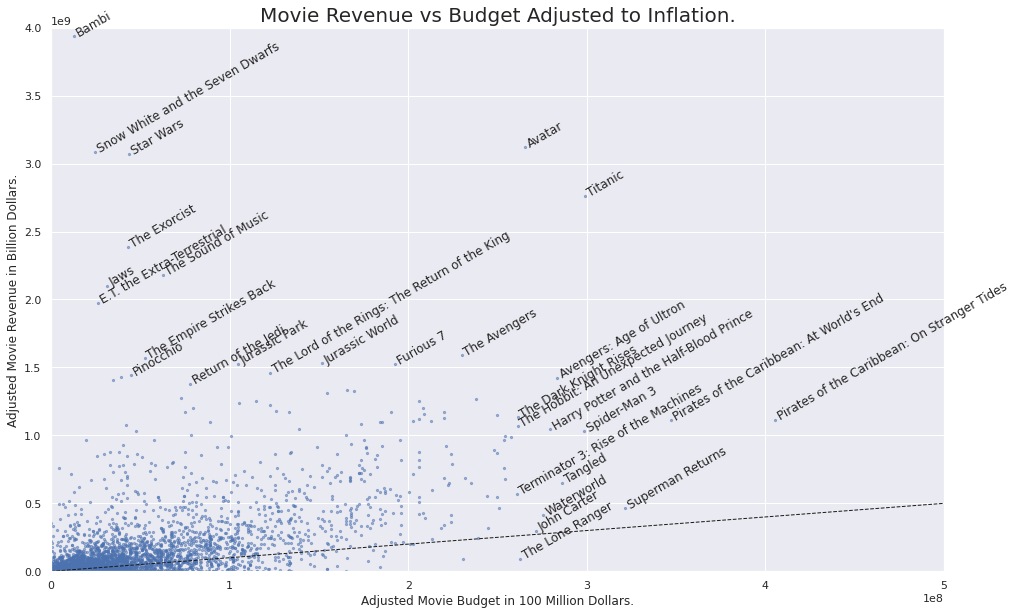

In [93]:
pos_budg = df[df["budget_adjusted"]>0]
x=pos_budg["budget_adjusted"]
y=pos_budg["revenue_adjusted"]
fig,ax=plt.subplots(figsize=(16,10))
plt.scatter(x,y,alpha=0.5,s=5)
plt.xlim(0,500000000)
plt.ylim(0,4000000000)
plt.title("Movie Revenue vs Budget Adjusted to Inflation.",fontsize=20)
plt.xlabel("Adjusted Movie Budget in 100 Million Dollars.")
plt.ylabel("Adjusted Movie Revenue in Billion Dollars.")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
for index , row in pos_budg.iterrows():
    x=row["budget_adjusted"]
    y=row["revenue_adjusted"]
    if((500000000>x>260000000) | (4000000000>y>1360000000)):
        title_to_annotate=row["title"]
        if((row["title"]!="The Godfather")&(row["title"]!="Fantasia")):
            plt.annotate(text=row["title"],xy=(x,y),rotation=30)
plt.savefig("movie_ad_rev_bud.png")

<ul>
    <li><b>Ajusted Movies Revenue and Release Year with Generes</b> : Analysing the adjusted revenue generated by each movie so far by plotting a multi barplot representing each genere against the release year of the movies. </li>
</ul>

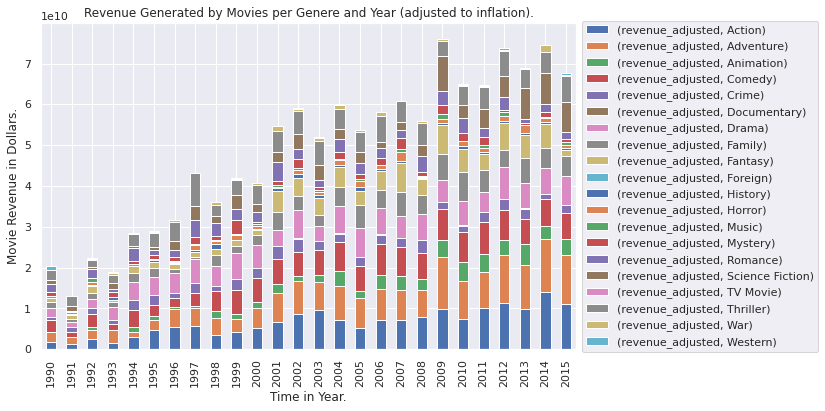

In [94]:
fig = plt.figure()
ax = plt.subplot(111)

starting_year = 1990
df_genres_revenue_year = df[['genres','revenue_adjusted','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.unstack(level=0).fillna(0).loc[starting_year:2015].plot(kind = 'bar',stacked=True, ax=ax, figsize=(12,6),legend  = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Revenue Generated by Movies per Genere and Year (adjusted to inflation).')
plt.ylabel('Movie Revenue in Dollars.')
plt.xlabel('Time in Year.')
plt.savefig("movie_ad_rev_gen_time.png")
plt.show()

<ul>
    <li><b>Average Movie Rating vs Movie Revenue</b> : Plotting a scatterplot of 'vote_average' and 'revenue' of the movies. </li>
</ul>

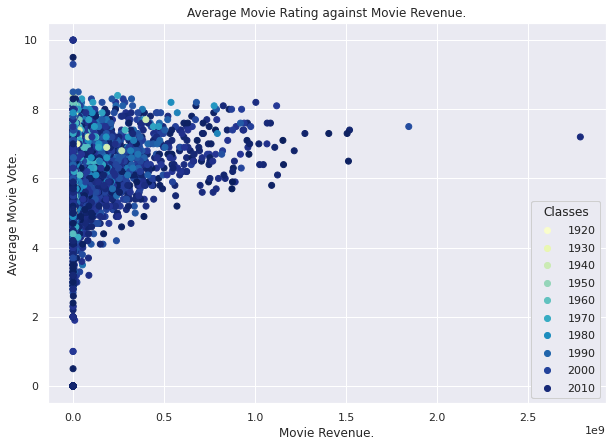

In [95]:
fig, ax = plt.subplots(figsize=(10,7))
scatter = ax.scatter( df['revenue'],df['vote_average'], c = df['year'],cmap='YlGnBu', marker  ='o')


legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.title('Average Movie Rating against Movie Revenue.')
plt.xlabel('Movie Revenue.')
plt.ylabel('Average Movie Vote.')
plt.savefig("movie_avg_rating_rev.png")
plt.show()

<ul>
    <li><b>Movie Rating</b> : Plotting a histogram of 'vote_count' to analyse the distribution of it. </li>
</ul>

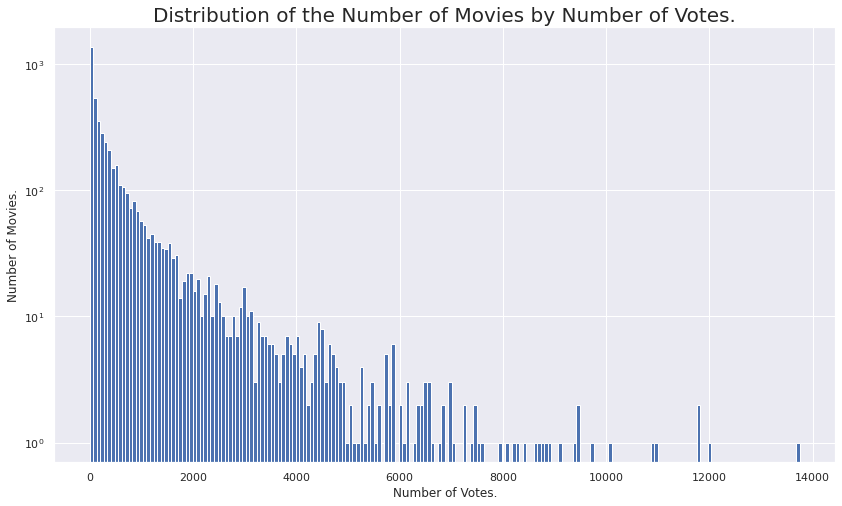

In [96]:
plt.figure(figsize=(14,8))
plt.hist(df['vote_count'],200)
plt.title('Distribution of the Number of Movies by Number of Votes.',fontsize=20)
plt.xlabel('Number of Votes.')
plt.ylabel('Number of Movies.')
plt.yscale("log")
plt.savefig("movie_vote_count_dist.png")
plt.show()

<ul>
    <li>Calculating number of movies per Production Companies. </li>
</ul>

In [97]:
df_movie_prod = df[['production_companies','id']].explode('production_companies')
df_movie_prod = df_movie_prod.groupby('production_companies').count().sort_values(by='id', ascending=False)
df_movie_prod.columns=["count"]
df_movie_prod

,count
production_companies,
Warner Bros.,319
Universal Pictures,311
Paramount Pictures,285
Twentieth Century Fox Film Corporation,222
Columbia Pictures,201
...,...
Haft Entertainment,1
Haishang Films,1
Hal Lieberman Company,1


<ul>
    <li><b>Production Companies vs Number of Movies</b> : Plotting a histogram of Number of Movies to analyse the distribution of it against Production Companies. </li>
</ul>

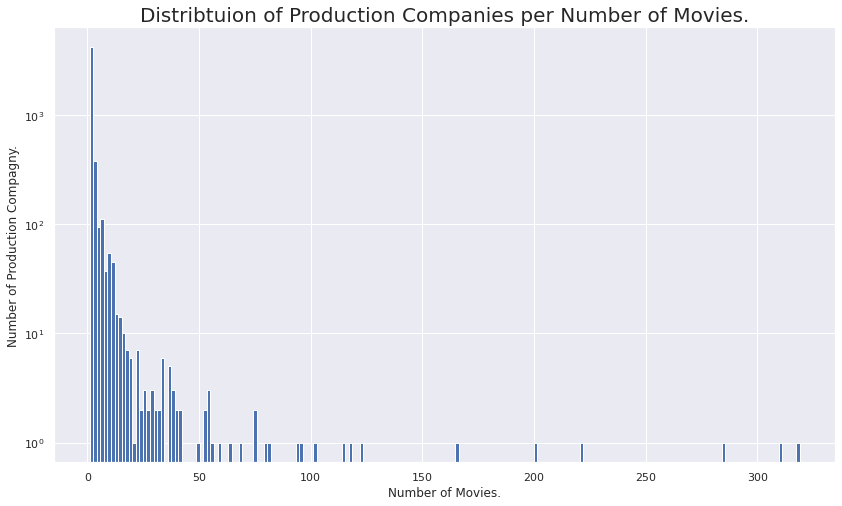

In [98]:
plt.figure(figsize=(14,8))
plt.hist(df_movie_prod['count'],200)
plt.title('Distribtuion of Production Companies per Number of Movies.',fontsize=20)
plt.ylabel('Number of Production Compagny.')
plt.xlabel('Number of Movies.')
plt.yscale("log")
plt.savefig("movie_prod_comp_no_mov.png")
plt.show()

<ul>
    <li><b>Top 20 Production Companies</b> : Plotting a barplot of Top 20 Production Companies. </li>
</ul>

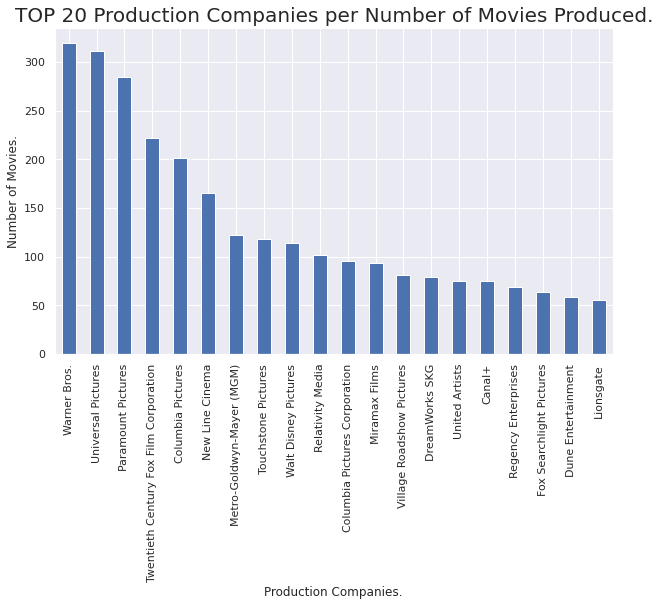

In [99]:
df_movie_prod[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 Production Companies per Number of Movies Produced.',fontsize=20)
plt.xlabel("Production Companies.")
plt.ylabel("Number of Movies.")
plt.savefig("movie_top_20_prod_comp.png")
plt.show()

<ul>
    <li> Calculating the Cumulative Production Companies Revenues. </li>
</ul>

In [100]:
df_movie_revenue = df[['production_companies','revenue']].explode('production_companies')
df_movie_revenue_sum = df_movie_revenue.groupby('production_companies').sum().sort_values(by='revenue', ascending=False)
df_movie_revenue_sum.head()

,revenue
production_companies,
Warner Bros.,49155747874
Universal Pictures,42588465942
Paramount Pictures,40878523165
Twentieth Century Fox Film Corporation,39357151309
Walt Disney Pictures,28683256048


<ul>
    <li><b>Cumulative Revenues of Top 20 Production Companies</b> : Plotting a barplot of Cumulative Revenue generated by Top 20 Production Companies. </li>
</ul>

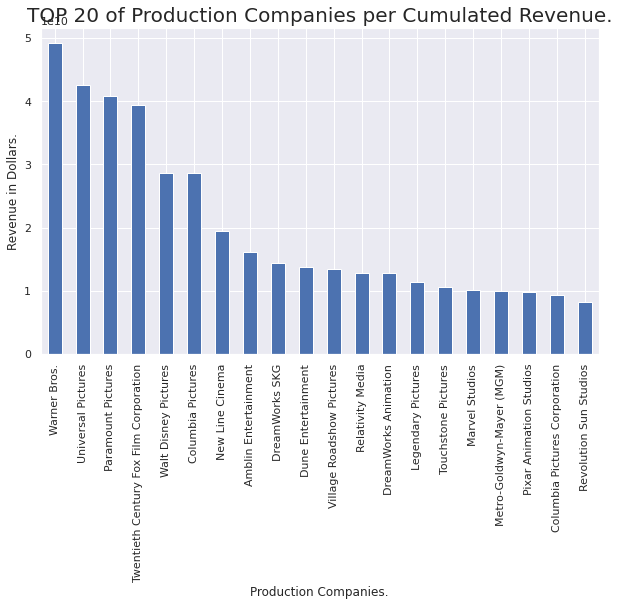

In [102]:
df_movie_revenue_sum[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of Production Companies per Cumulated Revenue.',fontsize=20)
plt.xlabel("Production Companies.")
plt.ylabel("Revenue in Dollars.")
plt.savefig("movie_top_20_cum_rev_prod_comp.png")
plt.show()

<ul>
    <li> Calculating the Average Production Companies Revenues. </li>
</ul>

In [103]:
df_movie_revenue_avg = df_movie_revenue.groupby('production_companies').mean().sort_values(by='revenue', ascending=False)
df_movie_revenue_avg.head()

,revenue
production_companies,
Abu Dhabi Film Commission,1.506249e+09
"Colorado Office of Film, Television & Media",1.506249e+09
Québec Production Services Tax Credit,1.506249e+09
Prime Focus,1.405404e+09
Vita-Ray Dutch Productions (III),1.153304e+09


<ul>
    <li><b>Average Revenues of Top 20 Production Companies</b> : Plotting a barplot of Average Revenue generated by Top 20 Production Companies. </li>
</ul>

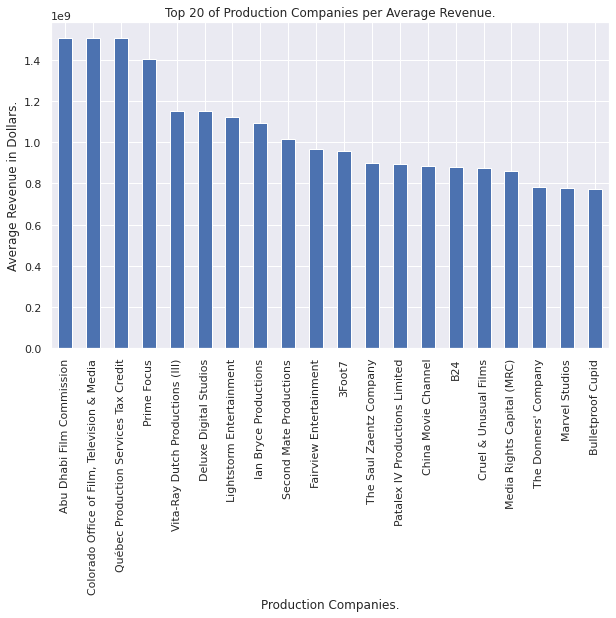

In [104]:
df_movie_revenue_avg[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('Top 20 of Production Companies per Average Revenue.')
plt.xlabel("Production Companies.")
plt.ylabel("Average Revenue in Dollars.")
plt.savefig("movie_top_20_avg_rev_prod_comp.png")
plt.show()

<ul>
    <li> Splitting the dataset on the basis of 'cast' setting 'title' as index. </li>
</ul>

In [105]:
df_actors = df.set_index('title').cast.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'cast'})
df_actors.head()

,title,cast
0,Avatar,"[Sam Worthington, 2]"
1,Avatar,"[Zoe Saldana, 1]"
2,Avatar,"[Sigourney Weaver, 1]"
3,Avatar,"[Stephen Lang, 2]"
4,Avatar,"[Michelle Rodriguez, 1]"


<ul>
    <li> Differentiating the dataset on the basis of gender setting 'title' as index. </li>
</ul>

In [106]:
df_actors['actor'] = df_actors['cast'].map(lambda x: x[0])
df_actors['actor_gender']  = df_actors['cast'].map(lambda x: x[1])
df_actors.drop(columns = 'cast',inplace = True)
df_actors.head()

,title,actor,actor_gender
0,Avatar,Sam Worthington,2
1,Avatar,Zoe Saldana,1
2,Avatar,Sigourney Weaver,1
3,Avatar,Stephen Lang,2
4,Avatar,Michelle Rodriguez,1


<ul>
    <li> Calculating the number of unique cast and merging the original dataset. </li>
</ul>

In [107]:
df_actors.actor.nunique()

54191

In [108]:
df_actor_movie = df_actors.merge(df, on='title', how='left').dropna()
df_actor_movie.head()

,title,actor,actor_gender,id,cast,crew,budget,genres,keywords,original_language,...,runtime,spoken_languages,status,vote_average,vote_count,day_of_year,year,month,budget_adjusted,revenue_adjusted
0,Avatar,Sam Worthington,2,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09
1,Avatar,Zoe Saldana,1,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09
2,Avatar,Sigourney Weaver,1,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09
3,Avatar,Stephen Lang,2,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09
4,Avatar,Michelle Rodriguez,1,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09


<ul>
    <li><b>Gender vs Mean Revenue</b> : Plotting a barplot of mean revenue generated with respect to the gender. </li>
</ul>

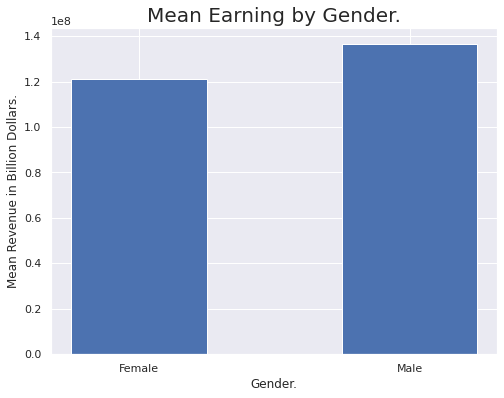

In [109]:
gender_plot=df_actor_movie.groupby('actor_gender')[['revenue']].mean()[1:]
f,ax=plt.subplots(figsize=(8,6))
plt.bar(["Female","Male"],gender_plot["revenue"],width=0.5)
plt.title("Mean Earning by Gender.",fontsize=20)
plt.xlabel("Gender.")
plt.ylabel("Mean Revenue in Billion Dollars.")
plt.savefig("movie_gender_rev.png")

<ul>
    <li>Calculating the mean revenue generated by respective gender each year. </li>
</ul>

In [64]:
gender_plot=df_actor_movie.groupby(['actor_gender',"year"])[['revenue']].mean()
gender_plot.unstack(level=0).fillna(0)

revenue                            
actor_gender             0             1             2
year                                                  
1916          8.394751e+06  8.394751e+06  8.394751e+06
1925          2.200000e+07  2.200000e+07  2.200000e+07
1927          6.504220e+05  6.504220e+05  6.504220e+05
1929          3.112857e+06  2.614800e+06  3.112857e+06
1930          8.000000e+06  8.000000e+06  8.000000e+06
...                    ...           ...           ...
2013          1.810503e+08  1.612159e+08  1.845305e+08
2014          1.495001e+08  1.519761e+08  2.001724e+08
2015          1.831828e+08  1.932302e+08  2.062367e+08
2016          2.508014e+08  2.372152e+08  2.686391e+08
2017          0.000000e+00  0.000000e+00  0.000000e+00

[90 rows x 3 columns]

<ul>
    <li><b>Year vs Mean Revenue w.r.t gender</b> : Plotting a lineplot of mean revenue generated with respect to the gender. </li>
</ul>

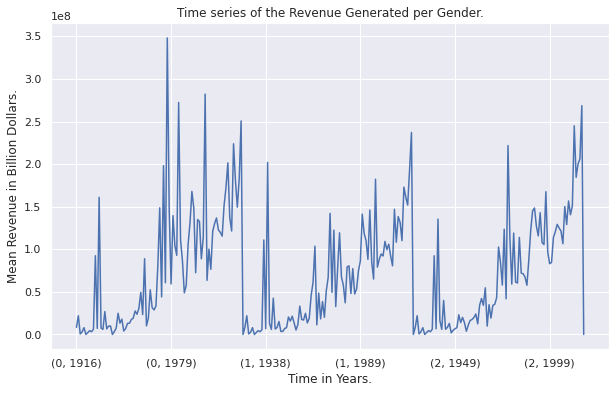

In [65]:
gender_plot.plot(figsize=(10,6),legend = False)
plt.title('Time series of the Revenue Generated per Gender.')
plt.xlabel("Time in Years.")
plt.ylabel("Mean Revenue in Billion Dollars.")
plt.show()

<ul>
    <li>Calculating the total Movies done by each actor and listing top places achieved by actors. </li>
</ul>

In [66]:
df_actor_movie_count = df_actor_movie.groupby('actor')[['id']].count().sort_values(by ='id',ascending = False)
df_actor_movie_count.columns=["count"]
df_actor_movie_count.head()

,count
actor,
Samuel L. Jackson,67
Robert De Niro,57
Bruce Willis,51
Matt Damon,48
Morgan Freeman,46


<ul>
    <li>Calculating the total number of actors casted in each movie and listing some of the highest casting movies. </li>
</ul>

In [67]:
df_nb_actors = df_actors.groupby('title')[['actor']].count().sort_values(by='actor',ascending = False)
df_nb_actors.rename(columns={"actor": "Number of actors"},inplace = True)
df_nb_actors.head(10)

,Number of actors
title,
Rock of Ages,224
Mr. Smith Goes to Washington,213
Jason Bourne,208
Les Misérables,208
You Don't Mess with the Zohan,183
Real Steel,172
Star Trek,168
Oz: The Great and Powerful,159
The Dark Knight Rises,158


<ul>
    <li><b>Number of Movies vs Number of Actors</b> : Plotting a histogram to analyse the distribution of total number of actors. </li>
</ul>

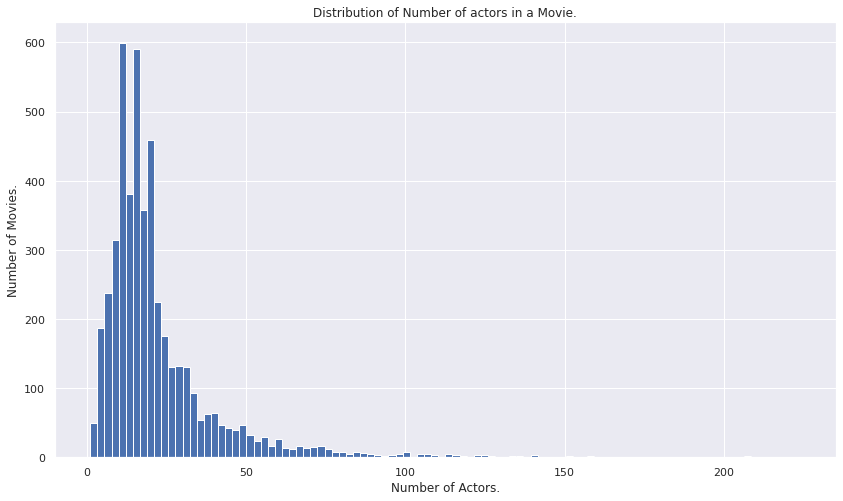

In [68]:
plt.figure(figsize=(14,8))
plt.hist(df_nb_actors['Number of actors'],100)
plt.title('Distribution of Number of actors in a Movie.')
plt.ylabel('Number of Movies.')
plt.xlabel('Number of Actors.')
plt.show()

<ul>
    <li><b>Number of Movies vs Actors</b> : Plotting a barplot of top 20 actors with highest number of movies delivered. </li>
</ul>

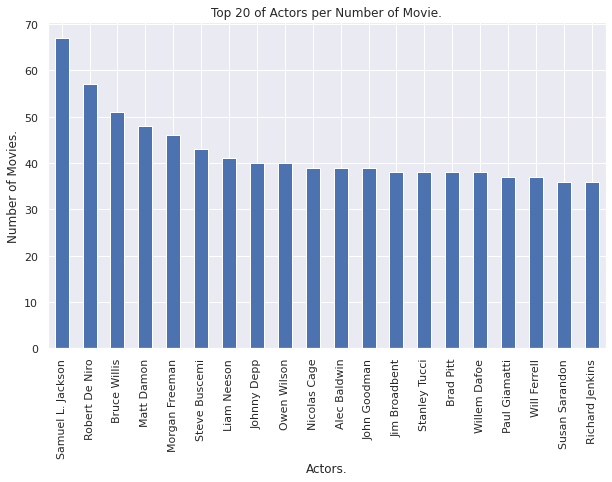

In [69]:
df_actor_movie_count[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('Top 20 of Actors per Number of Movie.')
plt.ylabel("Number of Movies.")
plt.xlabel("Actors.")
plt.show()

<ul>
    <li>Calculating the sum of revenue earned by each actor till now. </li>
</ul>

In [70]:
df_actor_revenue_sum = df_actor_movie.groupby('actor')[['revenue']].sum().sort_values(by ='revenue',ascending = False)
df_actor_revenue_sum.head()

,revenue
actor,
Stan Lee,17364063582
Samuel L. Jackson,14806065788
Frank Welker,11614837160
John Ratzenberger,11038044745
Hugo Weaving,10822190781


<ul>
    <li><b>Revenue Generated vs Actors</b> : Plotting a barplot of top 20 actors with highest number of Revenue Generated. </li>
</ul>

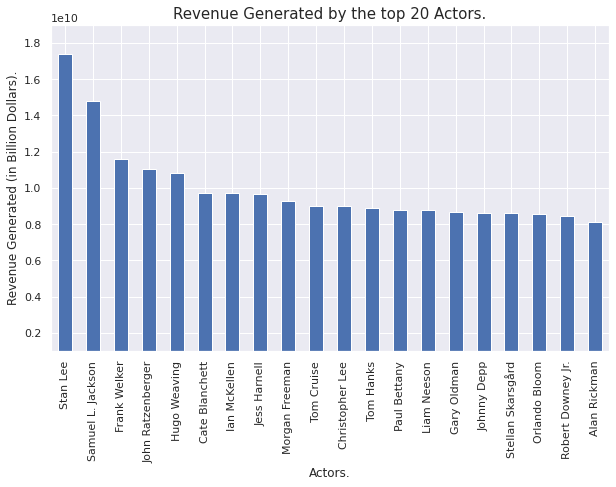

In [71]:
df_actor_revenue_sum[:20].plot(kind ="bar",figsize=(10,6),legend = False)

plt.title('Revenue Generated by the top 20 Actors.',fontsize=15)
plt.ylabel("Revenue Generated (in Billion Dollars).")
plt.xlabel("Actors.")
plt.ylim(1e9,1e10+9e9)
plt.show()

<ul>
    <li>Grouping of dataset w.r.t each actor on the basis of average voting. </li>
</ul>

In [72]:
df_actor_vote = df_actor_movie.groupby('actor')[['vote_average']].mean().sort_values(by ='vote_average',ascending = False)
df_actor_vote.head()

,vote_average
actor,
Patricia Wettig,10.0
Mel England,10.0
David Artus,10.0
Kevin Furlong,10.0
Travis Betz,10.0


<ul>
    <li><b>Average Score vs Actors</b> : Plotting a histogram to analyse the distribution of avarage voting of actors. </li>
</ul>

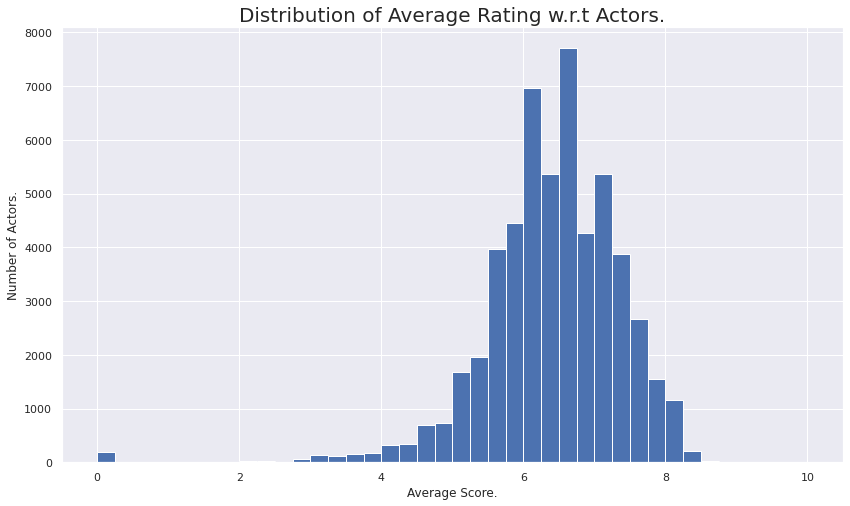

In [73]:
plt.figure(figsize=(14,8))
plt.hist(df_actor_vote['vote_average'],40)
plt.title('Distribution of Average Rating w.r.t Actors.',fontsize=20)
plt.xlabel('Average Score.')
plt.ylabel('Number of Actors.')
plt.show()

<ul>
    <li>Calculating the total number of people of specific gender working in this industry. </li>
</ul>

In [74]:
df_actor_movie['actor_gender'].value_counts()

actor_gender
2    48288
0    33790
1    24167
Name: count, dtype: int64

<ul>
    <li><b>Movie Revenue vs Number of Actors</b> : Plotting a scatterplot between Number of actors and movie revenue. Also noting the outliers for their different behaviour. </li>
</ul>

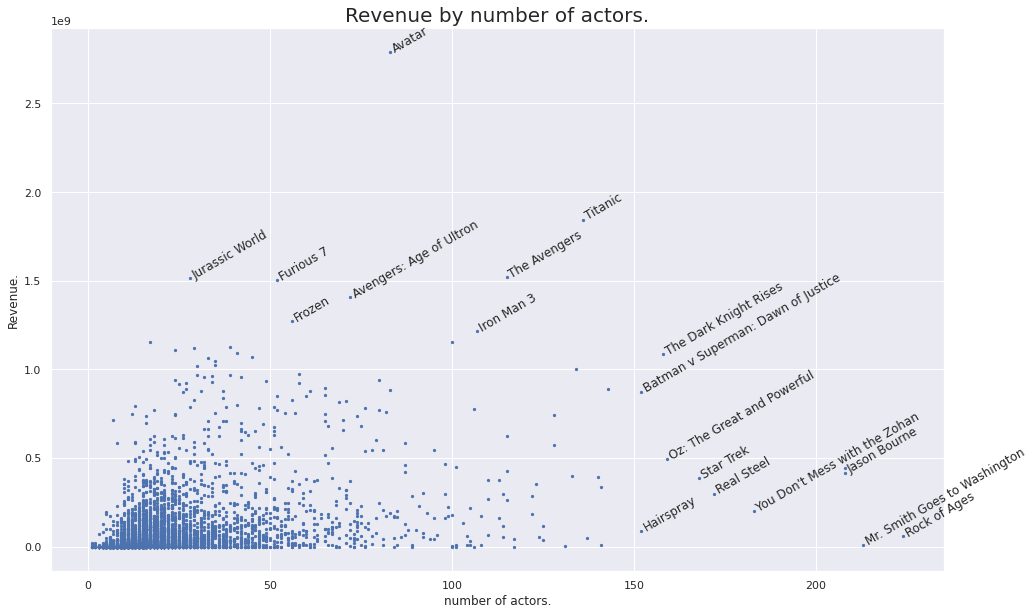

In [75]:
revenue_number_of_actors = df.join(df_nb_actors,on="title")[["revenue","Number of actors","title"]]
fig ,ax =plt.subplots(figsize=(16,10))
plt.scatter(y=revenue_number_of_actors["revenue"],x=revenue_number_of_actors["Number of actors"],alpha=1,s=5)
plt.title("Revenue by number of actors.",fontsize=20)
plt.xlabel("number of actors.")
plt.ylabel("Revenue.")
for index , row in revenue_number_of_actors.iterrows():
    x=row["Number of actors"]
    y=row["revenue"]
    if((x>150)|(y>1200000000)):
        title_to_annotate=row["title"]
        if (not title_to_annotate=="Les Misérables"):
            plt.annotate(text=row["title"],xy=(x,y),rotation=30)

<ul>
    <li>Attaching the crew with the title in one dataset. </li>
</ul>

In [76]:
df_crew = df.set_index('title').crew.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'crew'})
df_crew.head()

,title,crew
0,Avatar,"[Stephen E. Rivkin, Editor, Editing, 0]"
1,Avatar,"[Rick Carter, Production Design, Art, 2]"
2,Avatar,"[Christopher Boyes, Sound Designer, Sound, 0]"
3,Avatar,"[Christopher Boyes, Supervising Sound Editor, ..."
4,Avatar,"[Mali Finn, Casting, Production, 1]"


<ul>
    <li>Segragating the above dataset into 'crew_name', 'crew_job', 'crew_department', 'crew_gender'. </li>
</ul>

In [77]:
df_crew['crew_name'] = df_crew['crew'].map(lambda x: x[0])
df_crew['crew_job']  = df_crew['crew'].map(lambda x: x[1])
df_crew['crew_department']  = df_crew['crew'].map(lambda x: x[2])
df_crew['crew_gender']  = df_crew['crew'].map(lambda x: x[3])
df_crew.drop(columns = 'crew',inplace = True)
df_crew.head()

,title,crew_name,crew_job,crew_department,crew_gender
0,Avatar,Stephen E. Rivkin,Editor,Editing,0
1,Avatar,Rick Carter,Production Design,Art,2
2,Avatar,Christopher Boyes,Sound Designer,Sound,0
3,Avatar,Christopher Boyes,Supervising Sound Editor,Sound,0
4,Avatar,Mali Finn,Casting,Production,1


<ul>
    <li>Calculating the sum of each features of the above dataset. </li>
</ul>

In [78]:
df_crew.nunique()

title               4772
crew_name          52228
crew_job             418
crew_department       12
crew_gender            3
dtype: int64

<ul>
    <li>Calculating the total number of each crew job. </li>
</ul>

In [79]:
df_crew.crew_job.value_counts()[:10]

crew_job
Producer                   10205
Executive Producer          6177
Director                    5163
Screenplay                  5008
Editor                      4699
Casting                     4447
Director of Photography     3676
Art Direction               3338
Original Music Composer     3153
Production Design           2837
Name: count, dtype: int64

<ul>
    <li>Calculating the total number of each crew department. </li>
</ul>

In [80]:
df_crew.crew_department.value_counts()

crew_department
Production           27674
Sound                16174
Art                  14853
Crew                 13826
Costume & Make-Up    11188
Writing              10686
Camera                9204
Directing             8146
Editing               7855
Visual Effects        7553
Lighting              2410
Actors                   4
Name: count, dtype: int64

<ul>
    <li>Calculating the total number of each crew gender. </li>
</ul>

In [81]:
df_crew.crew_gender.value_counts()

crew_gender
0    74809
2    43000
1    11764
Name: count, dtype: int64

<ul>
    <li>Calculating the number of movies done by each crew member. </li>
</ul>

In [82]:
df_crew.groupby('crew_name')[['title']].count().sort_values(by='title', ascending=False).head()

,title
crew_name,
Robert Rodriguez,104
Steven Spielberg,84
Avy Kaufman,83
Mary Vernieu,82
Deborah Aquila,75


<ul>
    <li>Grouping the crew member w.r.t their department and calculating total number movies done by each crew member. </li>
</ul>

In [83]:
df_top_dep_crew=df_crew.groupby(['crew_department','crew_name'])[['title']].count().sort_values(by='title', ascending=False)
df_top_dep_crew.head(30)

title
crew_department crew_name                 
Production      Avy Kaufman             83
                Mary Vernieu            82
                Deborah Aquila          75
Sound           James Newton Howard     69
Production      Harvey Weinstein        68
Sound           Hans Zimmer             68
Production      Tricia Wood             67
                Bob Weinstein           67
                Francine Maisler        63
Sound           John Debney             60
                Danny Elfman            57
Production      Kerry Barden            55
Sound           Christophe Beck         54
Production      Arnon Milchan           54
                Scott Rudin             54
Sound           Kevin Kaska             53
                John Williams           52
Production      Tim Bevan               52
                Bruce Berman            52
                John Papsidera          52
                Billy Hopkins           51
                Steven Spielberg        51
                Eric Fellner            50
Sound           Dan O'Connell           50
                Marco Beltrami          49
                Alan Silvestri          49
                John Powell             48
                James Horner            48
Production      Denise Chamian          46
Sound           Jerry Goldsmith         46

<ul>
    <li>Since there are multiple working profile performed by a single crew. To avoid that, I will count such type of crew as a single person only </li>
</ul>

In [84]:
df_crew[df_crew['crew_name'] == 'Steven Spielberg']['crew_department'].unique()

array(['Production', 'Directing', 'Writing', 'Crew'], dtype=object)

In [85]:
nb_crew_kept = 1000
top_crew = df_top_dep_crew.index.get_level_values('crew_name')[:nb_crew_kept].values
df_crew_top = df_crew[df_crew.crew_name.map(lambda x: x in top_crew)]
df_crew_top.crew_department.value_counts()

crew_department
Production           6222
Sound                5132
Camera               1955
Editing              1384
Art                  1326
Costume & Make-Up    1185
Directing             695
Crew                  630
Writing               595
Visual Effects        294
Lighting               36
Name: count, dtype: int64

<ul>
    <li>Calculating the total number of crew members associated with a particular movie.</li>
</ul>

In [86]:
df_crew.groupby(['title']).count()[['crew_name']].sort_values(by='crew_name', ascending=False).head(10)

,crew_name
title,
Jurassic World,435
15 Minutes,338
The Wolf of Wall Street,244
"Monsters, Inc.",242
The Day After Tomorrow,228
The Core,222
The Dark Knight Rises,217
The X Files: I Want to Believe,200
V for Vendetta,194


<ul>
    <li>Grouping of crew members with the title into their respective department.</li>
</ul>

In [87]:
df_crew.groupby(['crew_department','title']).count()[['crew_name']].sort_values(by='crew_name', ascending=False).head(10)

crew_name
crew_department title                                    
Crew            15 Minutes                            180
                Jurassic World                        157
Visual Effects  Monsters, Inc.                        104
                Bolt                                   89
Crew            The X Files: I Want to Believe         89
                The Wolf of Wall Street                89
                V for Vendetta                         88
Visual Effects  Toy Story 2                            81
Crew            The Dark Knight Rises                  68
Visual Effects  Jurassic World                         59

<ul>
    <li>Merging of crew dataset with the original dataset.</li>
</ul>

In [88]:
df_crew_movie = df_crew.merge(df, on = 'title', how = 'left').dropna()
df_crew_movie.head()

,title,crew_name,crew_job,crew_department,crew_gender,id,cast,crew,budget,genres,...,runtime,spoken_languages,status,vote_average,vote_count,day_of_year,year,month,budget_adjusted,revenue_adjusted
0,Avatar,Stephen E. Rivkin,Editor,Editing,0,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09
1,Avatar,Rick Carter,Production Design,Art,2,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09
2,Avatar,Christopher Boyes,Sound Designer,Sound,0,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09
3,Avatar,Christopher Boyes,Supervising Sound Editor,Sound,0,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09
4,Avatar,Mali Finn,Casting,Production,1,19995,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",...,162.0,"[English, Español]",Released,7.2,11800,344,2009,12,2.651368e+08,3.118954e+09


<ul>
    <li>Grouping of each crew member with title into their respective generes.</li>
</ul>

In [89]:
df_crew_movie_exploded_genre = df_crew_movie.explode('genres')
df_crew_movie_exploded_genre.groupby(['genres','crew_name'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
genres   crew_name              
Action   Robert Rodriguez     76
Drama    Avy Kaufman          64
Action   Stan Lee             45
         Luc Besson           45
Comedy   Christophe Beck      43
         Woody Allen          43
Thriller Robert Rodriguez     43
Family   Robert Rodriguez     42
Thriller Deborah Aquila       41
Drama    Mary Vernieu         40

<ul>
    <li>Exploding the above dataset into 'genres', 'crew_name', 'crew_job', 'title'.</li>
</ul>

In [90]:
df_crew_movie_exploded_genre.groupby(['genres','crew_name','crew_job'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
genres   crew_name        crew_job                      
Drama    Avy Kaufman      Casting                     64
Thriller Deborah Aquila   Casting                     41
Comedy   Christophe Beck  Original Music Composer     41
Drama    Mary Vernieu     Casting                     39
         Francine Maisler Casting                     39
Thriller Tricia Wood      Casting                     38
Drama    Deborah Aquila   Casting                     37
Thriller Mary Vernieu     Casting                     36
Action   Dan O'Connell    Foley                       36
         Joel Silver      Producer                    33

<ul>
    <li>Segragating the dataset 'genres', 'title' into grouping of 'crew_job'.</li>
</ul>

In [91]:
df_crew_movie_exploded_genre.groupby(['crew_job','genres'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
crew_job           genres         
Producer           Drama      5077
                   Comedy     3381
                   Thriller   3130
                   Action     2843
Executive Producer Drama      2827
Director           Drama      2400
Screenplay         Drama      2174
Editor             Drama      2154
Casting            Drama      2056
Executive Producer Thriller   2033

<ul>
    <li>Grouping of crew member w.r.t their job and total revenue earned by them respectively.</li>
</ul>

In [92]:
df_crew_movie.groupby(['crew_job','crew_name'])[['revenue']].sum().sort_values(by='revenue',ascending= False).head(10)

,,revenue
crew_job,crew_name,
Original Music Composer,Hans Zimmer,20928347941
Orchestrator,Kevin Kaska,18343111015
Original Music Composer,John Williams,17840602951
Compositors,Brian N. Bentley,17112706336
Executive Producer,Stan Lee,15566001300
Original Music Composer,James Newton Howard,15205930063
Casting,Sarah Finn,14343514479
Foley,Dan O'Connell,14018667060
Original Music Composer,Danny Elfman,12615749180


<ul>
    <li>Calculating the Number of times a particular keyword is used in movies .</li>
</ul>

In [93]:
df.explode('keywords').groupby(['keywords'])[['id']].count().sort_values(by='id', ascending=False)[:10]

,id
keywords,
woman director,324
independent film,318
duringcreditsstinger,307
based on novel,197
murder,189
aftercreditsstinger,170
violence,150
dystopia,139
sport,126


<ul>
    <li>Calculating the total Number of movies produced in each country.</li>
</ul>

In [94]:
df_prod_countries_count = df.explode('production_countries')['production_countries'].value_counts()
df_prod_countries_count.head(10)

production_countries
United States of America    3956
United Kingdom               635
Germany                      324
France                       306
Canada                       261
Australia                    110
Italy                         71
Spain                         71
China                         59
Japan                         58
Name: count, dtype: int64

<ul>
    <li><b>Production Countries</b> : Barplot of top 20 production countries. </li>
</ul>

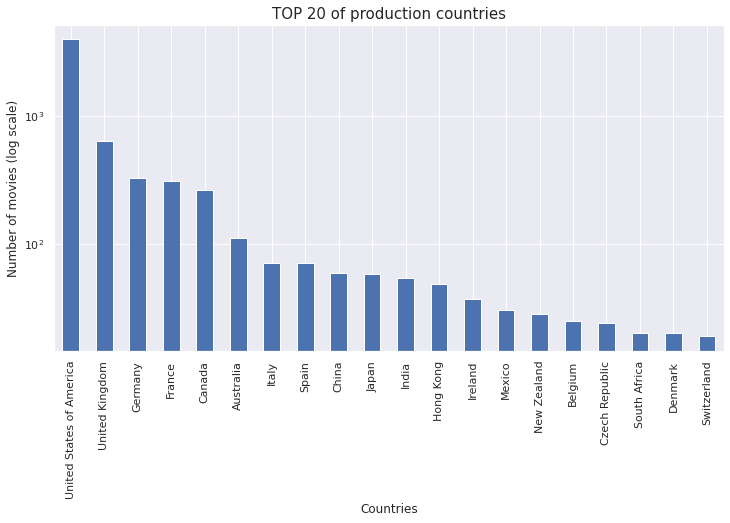

In [95]:
df_prod_countries_count[:20].plot(kind ="bar",figsize=(12,6),legend = False)
plt.title('TOP 20 of production countries',fontsize=15)
plt.ylabel("Number of movies (log scale)")
plt.xlabel("Countries")
plt.yscale("log")
plt.show()

<ul>
    <li>Calculating the total Number of movies made in each language.</li>
</ul>

In [96]:
df_lang_count = df.explode('spoken_languages')['spoken_languages'].value_counts()
df_lang_count.head(10)

spoken_languages
English      4484
Français      437
Español       350
Deutsch       262
Italiano      188
Pусский       185
普通话           107
日本語            97
Português      68
العربية        67
Name: count, dtype: int64

<ul>
    <li><b>Spoken Languages</b> : Barplot of top 20 spoken languages. </li>
</ul>

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabt

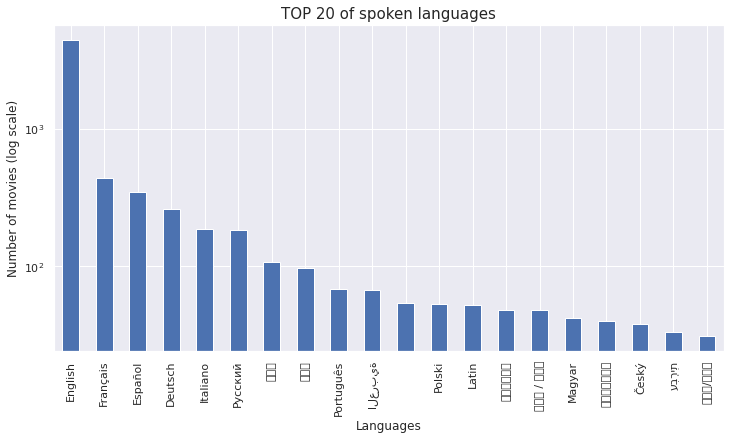

In [97]:
df_lang_count[:20].plot(kind ="bar",figsize=(12,6),legend = False)
plt.title('TOP 20 of spoken languages',fontsize=15)
plt.ylabel("Number of movies (log scale)")
plt.xlabel("Languages")
plt.yscale("log")
plt.show()

<ul>
    <li><b>Original Languages</b> : Barplot of top 20 original languages. </li>
</ul>

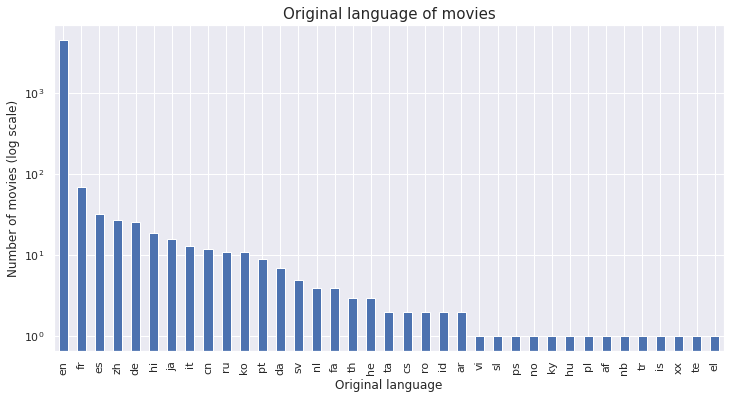

In [98]:
fig , ax =plt.subplots(figsize=(12,6))
df.original_language.value_counts().plot(kind='bar')

plt.yscale("log")
plt.title("Original language of movies",fontsize=15)
plt.xlabel("Original language")
plt.ylabel("Number of movies (log scale)")
plt.show()

<ul>
    <li>Calculating the total Number of movies w.r.t their status.</li>
</ul>

In [99]:
df.status.value_counts()

status
Released           4791
Rumored               5
Post Production       3
Name: count, dtype: int64

In [100]:
df.columns

Index(['id', 'cast', 'crew', 'budget', 'genres', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'day_of_year', 'year', 'month',
       'budget_adjusted', 'revenue_adjusted'],
      dtype='object')

In [101]:
features_kept = ['title','keywords','budget','genres','popularity', 'production_companies', 
                'production_countries', 'year' ,'day_of_year','month','revenue', 'runtime', 'spoken_languages',
                'vote_average', 'vote_count',]

data = df[features_kept].set_index('title')
data=data[data["year"]>1960]
data.head()

,keywords,budget,genres,popularity,production_companies,production_countries,year,day_of_year,month,revenue,runtime,spoken_languages,vote_average,vote_count
title,,,,,,,,,,,,,,
Avatar,"[culture clash, future, space war, space colon...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009,344,12,2787965087,162.0,"[English, Español]",7.2,11800
Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...",300000000,"[Adventure, Fantasy, Action]",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007,139,5,961000000,169.0,[English],6.9,4500
Spectre,"[spy, based on novel, secret agent, sequel, mi...",245000000,"[Action, Adventure, Crime]",107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015,299,10,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",6.3,4466
The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...",250000000,"[Action, Crime, Drama, Thriller]",112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012,198,7,1084939099,165.0,[English],7.6,9106
John Carter,"[based on novel, mars, medallion, space travel...",260000000,"[Action, Adventure, Science Fiction]",43.926995,[Walt Disney Pictures],[United States of America],2012,67,3,284139100,132.0,[English],6.1,2124


In [102]:
data.shape

(4724, 14)